In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
data=pd.read_csv('data.csv',low_memory=False)
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [3]:
data.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [4]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data[data['ORDERDATE'] == '2020-05-31']['CUSTOMERNAME'].nunique()

C:\Users\Serhat Turan\AppData\Local\Temp\ipykernel_10772\694220407.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


2

In [5]:
data['DAYS_SINCE_LASTORDER'].nunique()

1832

In [6]:
#Drop the columns irrelevant at the EDA()
data = data.drop(columns=['PHONE','ADDRESSLINE1','POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME'])

In [7]:
data_num = data.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(data_num.columns, len(list(data_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object') 6


In [8]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


In [9]:
data_num.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
0,30,95.70,2,2871.00,828,95
1,34,81.35,5,2765.90,757,95
2,41,94.74,2,3884.34,703,95
3,45,83.26,6,3746.70,649,95
4,36,96.66,1,3479.76,586,95


In [10]:
display(round(data_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.09,819.28,42.00,1077.00,1761.00,2436.50,3562.00
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


In [11]:
data_obj = data.select_dtypes(include = ['object'])
print(data_obj.columns, len(list(data_obj.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'COUNTRY', 'DEALSIZE'],
      dtype='object') 7


In [12]:
data_obj.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,Shipped,Motorcycles,S10_1678,Reims Collectables,Reims,France,Small
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,Paris,France,Medium
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,Shipped,Motorcycles,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


In [13]:
data_obj['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [14]:
#In Process, Resolved, Shipped, On Hold could be useful.
#But we need drop the Disputed and Cancalled columns
data_obj = data_obj[data_obj['STATUS'] != 'Disputed']
data_obj = data_obj[data_obj['STATUS'] != 'Cancelled']

In [15]:
#We dropped the unwanted columns.
data_obj['STATUS'].unique()

array(['Shipped', 'In Process', 'On Hold', 'Resolved'], dtype=object)

In [16]:
data_obj.select_dtypes(include = ['object']).describe().T


,count,unique,top,freq
STATUS,2673,4,Shipped,2541
PRODUCTLINE,2673,7,Classic Cars,930
PRODUCTCODE,2673,109,S18_3232,50
CUSTOMERNAME,2673,89,Euro Shopping Channel,237
CITY,2673,71,Madrid,282
COUNTRY,2673,19,USA,914
DEALSIZE,2673,3,Medium,1311


In [17]:
data_obj['PRODUCT_DEAL_COMBO'] = data_obj['DEALSIZE'] + '_' + data_obj['PRODUCTLINE']
data_obj['PRODUCT_DEAL_COMBO'].value_counts()

PRODUCT_DEAL_COMBO
Medium_Classic Cars        508
Small_Classic Cars         330
Small_Vintage Cars         301
Medium_Vintage Cars        241
Medium_Trucks and Buses    173
Small_Planes               157
Small_Motorcycles          146
Medium_Motorcycles         145
Medium_Planes              124
Small_Ships                116
Small_Trucks and Buses     115
Medium_Ships                95
Large_Classic Cars          92
Small_Trains                50
Medium_Trains               25
Large_Vintage Cars          22
Large_Motorcycles           16
Large_Planes                 9
Large_Trucks and Buses       7
Large_Trains                 1
Name: count, dtype: int64

In [18]:
combo_encoded = pd.get_dummies(data_obj['PRODUCT_DEAL_COMBO'], prefix='PD')
data_obj = pd.concat([data_obj, combo_encoded], axis=1)

data_obj

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,PRODUCT_DEAL_COMBO,PD_Large_Classic Cars,PD_Large_Motorcycles,...,PD_Medium_Trains,PD_Medium_Trucks and Buses,PD_Medium_Vintage Cars,PD_Small_Classic Cars,PD_Small_Motorcycles,PD_Small_Planes,PD_Small_Ships,PD_Small_Trains,PD_Small_Trucks and Buses,PD_Small_Vintage Cars
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,NYC,USA,Small,Small_Motorcycles,False,False,...,False,False,False,False,True,False,False,False,False,False
1,Shipped,Motorcycles,S10_1678,Reims Collectables,Reims,France,Small,Small_Motorcycles,False,False,...,False,False,False,False,True,False,False,False,False,False
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,Paris,France,Medium,Medium_Motorcycles,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium,Medium_Motorcycles,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Shipped,Motorcycles,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium,Medium_Motorcycles,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,Shipped,Ships,S72_3212,Euro Shopping Channel,Madrid,Spain,Small,Small_Ships,False,False,...,False,False,False,False,False,False,True,False,False,False
2743,Shipped,Ships,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium,Medium_Ships,False,False,...,False,False,False,False,False,False,False,False,False,False
2744,Resolved,Ships,S72_3212,Euro Shopping Channel,Madrid,Spain,Medium,Medium_Ships,False,False,...,False,False,False,False,False,False,False,False,False,False
2745,Shipped,Ships,S72_3212,Alpha Cognac,Toulouse,France,Small,Small_Ships,False,False,...,False,False,False,False,False,False,True,False,False,False


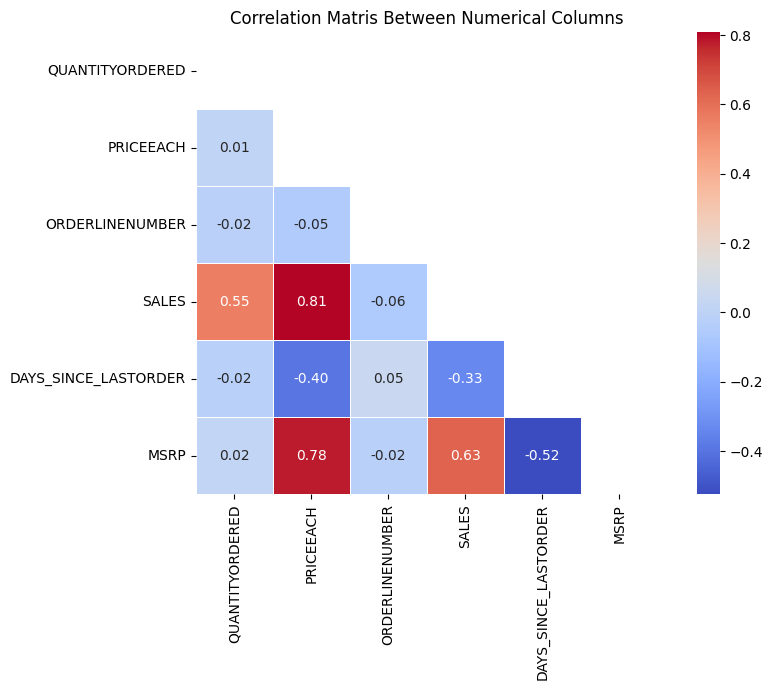

In [19]:
# Calculate Correlation
corr = data_num.corr()

# Upper Triangle
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, square=True, linewidths=0.5)
plt.title("Correlation Matris Between Numerical Columns")
plt.show()

In [20]:
threshold = 0.8
high_corr = corr[(corr > threshold) & (corr < 1.0)].stack()
print("Yüksek Korelasyonlu Değişkenler:\n", high_corr)


Yüksek Korelasyonlu Değişkenler:
 PRICEEACH  SALES        0.808287
SALES      PRICEEACH    0.808287
dtype: float64


In [21]:
#For saving the original data.
data_time = data.copy()

In [22]:
#Creating Time Series.
data_time['YEAR'] = data_time['ORDERDATE'].dt.year
data_time['MONTH'] = data_time['ORDERDATE'].dt.month
data_time['WEEK'] = data_time['ORDERDATE'].dt.isocalendar().week
data_time['QUARTER'] = data_time['ORDERDATE'].dt.quarter

In [23]:
data_time

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,YEAR,MONTH,WEEK,QUARTER
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small,2018,2,8,1
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small,2018,5,19,2
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium,2018,7,26,3
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium,2018,8,34,3
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium,2018,10,43,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Small,2019,12,49,4
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium,2020,1,5,1
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Medium,2020,3,9,1
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,Small,2020,3,13,1


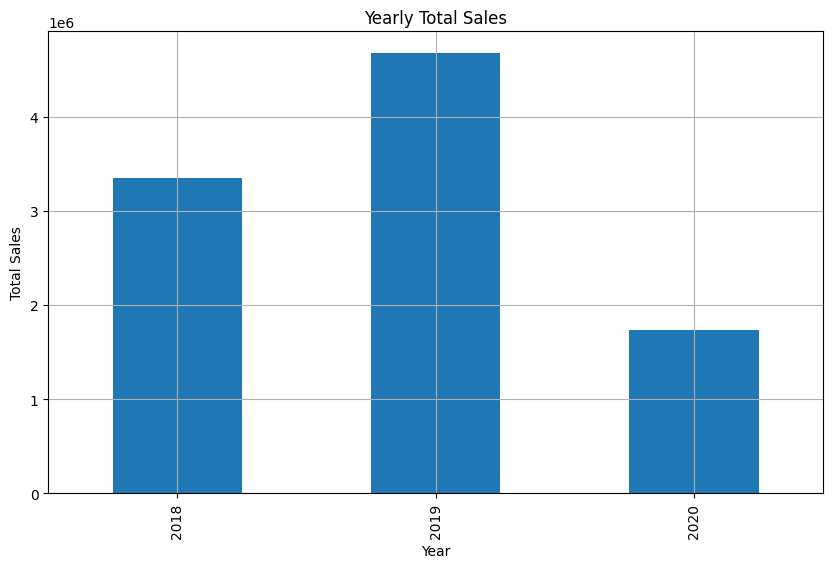

In [24]:
yearly_sales = data_time.groupby('YEAR')['SALES'].sum()

yearly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.grid(True)
plt.show()

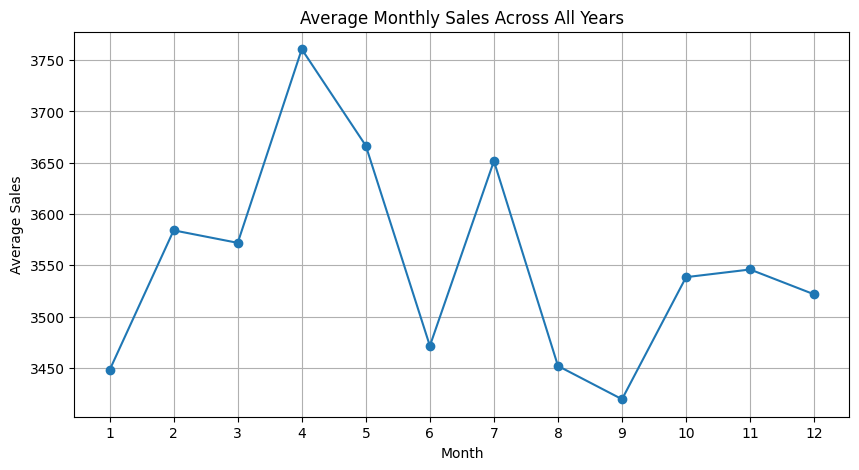

In [25]:
monthly_sales = data_time.groupby('MONTH')['SALES'].mean()

monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average Monthly Sales Across All Years')
plt.ylabel('Average Sales')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

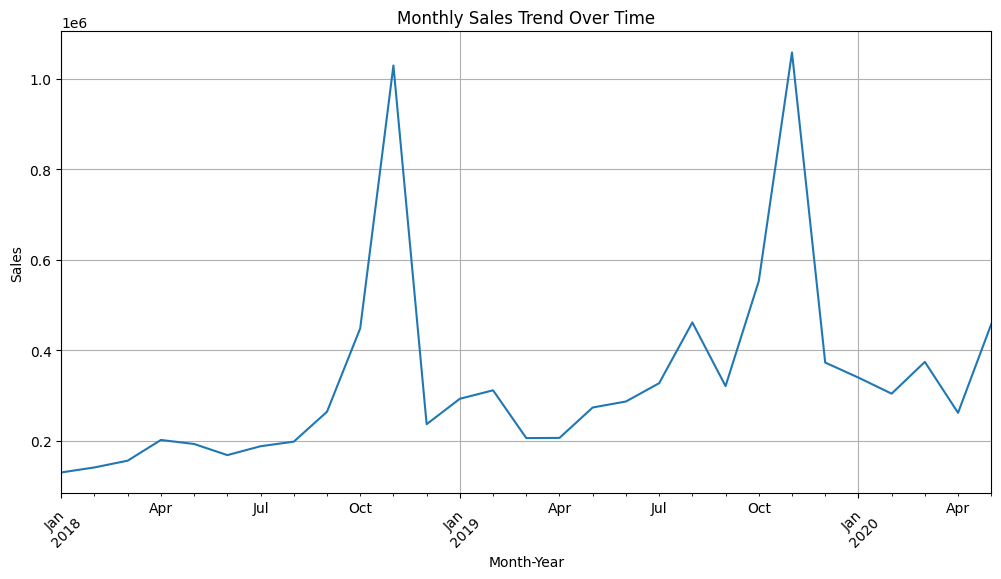

In [26]:
monthly_yearly = data.groupby([data['ORDERDATE'].dt.to_period('M')])['SALES'].sum()

monthly_yearly.plot(figsize=(12, 6))
plt.title('Monthly Sales Trend Over Time')
plt.ylabel('Sales')
plt.xlabel('Month-Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

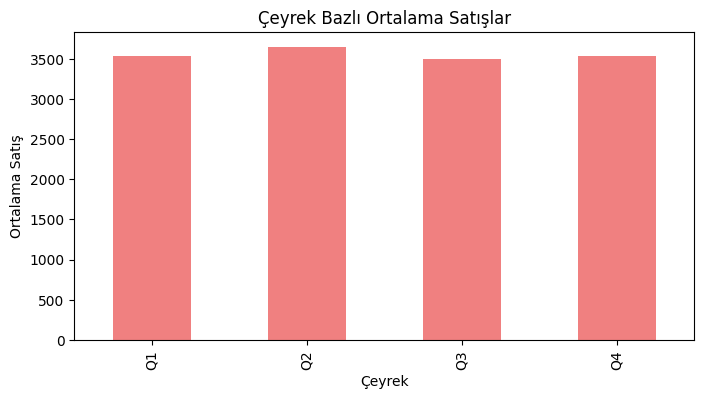

In [27]:
quarter_avg = data_time.groupby('QUARTER')['SALES'].mean()

quarter_avg.plot(kind='bar', color='lightcoral', figsize=(8,4))
plt.title("Çeyrek Bazlı Ortalama Satışlar")
plt.xlabel("Çeyrek")
plt.ylabel("Ortalama Satış")
plt.xticks([0,1,2,3], ['Q1','Q2','Q3','Q4'])
plt.show()

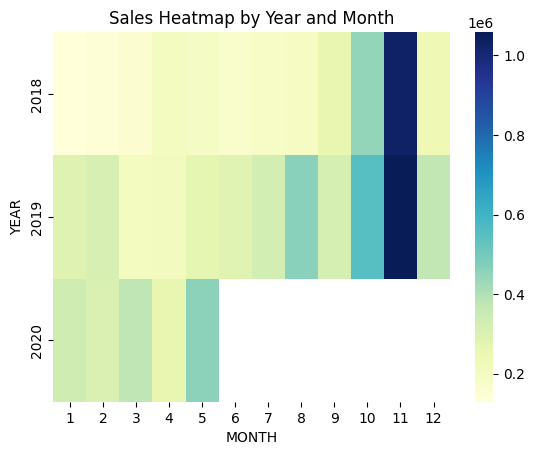

In [28]:
heatmap_data = data_time.groupby(['YEAR', 'MONTH'])['SALES'].sum().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title("Sales Heatmap by Year and Month")
plt.show()

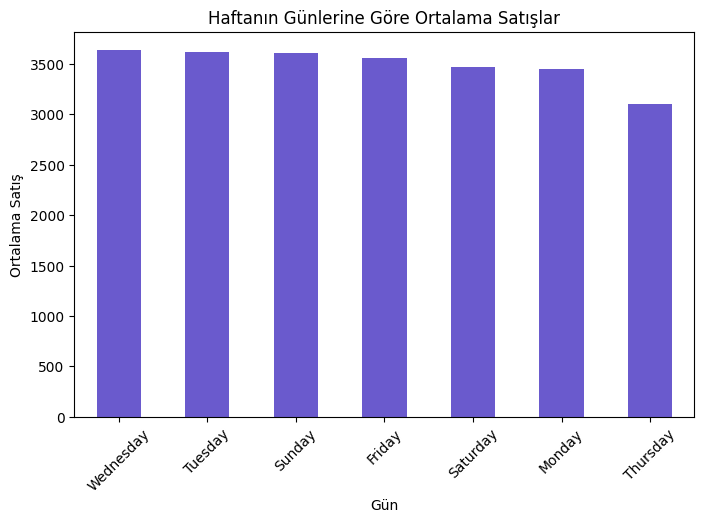

In [29]:
# Haftanın günlerini çıkar
data_time['WEEKDAY'] = data_time['ORDERDATE'].dt.dayofweek  # 0 = Pazartesi, 6 = Pazar

# Gün isimlerini de ekle (isteğe bağlı)
data_time['WEEKDAY_NAME'] = data_time['ORDERDATE'].dt.day_name()

# Günlere göre ortalama satış
weekday_avg = data_time.groupby('WEEKDAY_NAME')['SALES'].mean().sort_values(ascending=False)

# Çizim
weekday_avg.plot(kind='bar', color='slateblue', figsize=(8,5))
plt.title("Haftanın Günlerine Göre Ortalama Satışlar")
plt.xlabel("Gün")
plt.ylabel("Ortalama Satış")
plt.xticks(rotation=45)
plt.show()

WEEKDAY_NAME
Sunday       602
Monday       530
Tuesday      523
Wednesday    378
Saturday     371
Friday       294
Thursday      49
dtype: int64


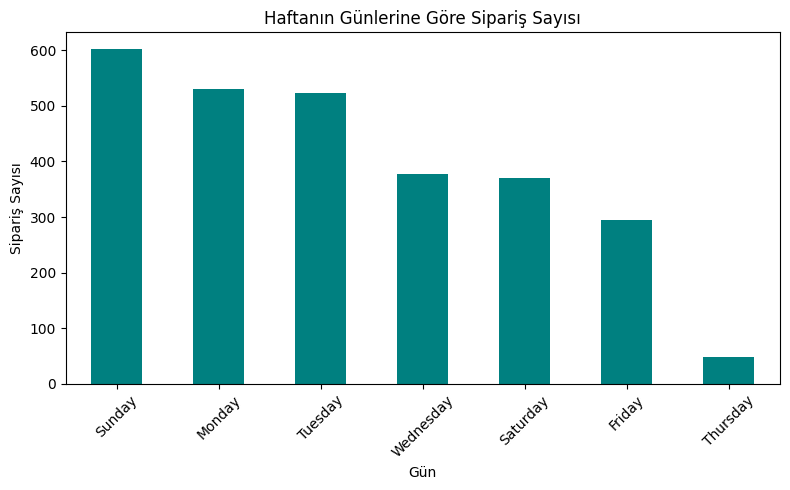

In [30]:
# Önce haftanın günü sütunu varsa, doğrudan kullanabilirsin
data_time['WEEKDAY_NAME'] = data_time['ORDERDATE'].dt.day_name()

# Günlere göre toplam sipariş sayısı (satır sayısı)
weekday_order_count = data_time.groupby('WEEKDAY_NAME').size().sort_values(ascending=False)

print(weekday_order_count)
plt.figure(figsize=(8, 5))
weekday_order_count.plot(kind='bar', color='teal')
plt.title("Haftanın Günlerine Göre Sipariş Sayısı")
plt.xlabel("Gün")
plt.ylabel("Sipariş Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
data_time['WEEKDAY_NAME']

0        Saturday
1          Monday
2          Sunday
3        Saturday
4          Sunday
          ...    
2742       Monday
2743       Friday
2744       Sunday
2745     Saturday
2746    Wednesday
Name: WEEKDAY_NAME, Length: 2747, dtype: object

In [32]:
data_time

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,YEAR,MONTH,WEEK,QUARTER,WEEKDAY,WEEKDAY_NAME
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,NYC,USA,Small,2018,2,8,1,5,Saturday
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,Reims,France,Small,2018,5,19,2,0,Monday
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,Paris,France,Medium,2018,7,26,3,6,Sunday
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,Pasadena,USA,Medium,2018,8,34,3,5,Saturday
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,Burlingame,USA,Medium,2018,10,43,4,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,...,Euro Shopping Channel,Madrid,Spain,Small,2019,12,49,4,0,Monday
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,...,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium,2020,1,5,1,4,Friday
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,...,Euro Shopping Channel,Madrid,Spain,Medium,2020,3,9,1,6,Sunday
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,...,Alpha Cognac,Toulouse,France,Small,2020,3,13,1,5,Saturday


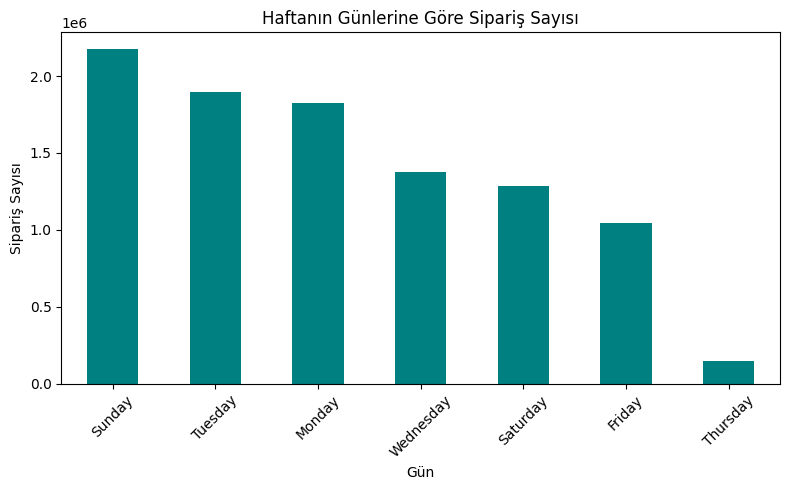

In [33]:
total_sales = data_time.groupby("WEEKDAY_NAME")["SALES"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
total_sales.plot(kind='bar', color='teal')
plt.title("Haftanın Günlerine Göre Sipariş Sayısı")
plt.xlabel("Gün")
plt.ylabel("Sipariş Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

WEEKDAY_NAME
Sunday       602
Monday       530
Tuesday      523
Wednesday    378
Saturday     371
Friday       294
Thursday      49
dtype: int64


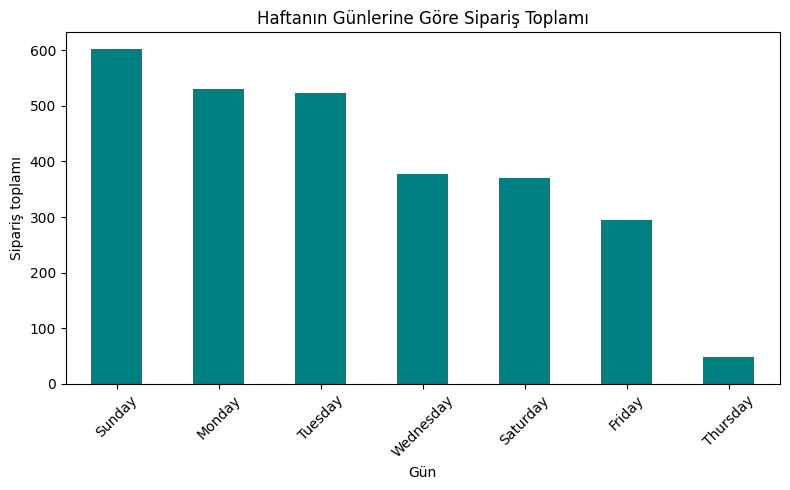

In [34]:
# Önce haftanın günü sütunu varsa, doğrudan kullanabilirsin
data_time['WEEKDAY_NAME'] = data_time['ORDERDATE'].dt.day_name()

# Günlere göre toplam sipariş sayısı (satır sayısı)
weekday_order_count = data_time.groupby('WEEKDAY_NAME').size().sort_values(ascending=False)

print(weekday_order_count)
plt.figure(figsize=(8, 5))
weekday_order_count.plot(kind='bar', color='teal')
plt.title("Haftanın Günlerine Göre Sipariş Toplamı")
plt.xlabel("Gün")
plt.ylabel("Sipariş toplamı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
data_time[data_time['WEEKDAY_NAME']=="Thursday"]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,COUNTRY,DEALSIZE,YEAR,MONTH,WEEK,QUARTER,WEEKDAY,WEEKDAY_NAME,DAY_OF_MONTH,PRODUCT_SEGMENT
104,10178,24,145.52,12,3492.48,2018-11-08,675,Shipped,Classic Cars,136,...,France,Medium,2018,11,45,4,3,Thursday,8,MEDIUM_CLASSIC CARS
116,10337,25,48.05,8,1201.25,2019-11-21,309,Shipped,Classic Cars,136,...,USA,Small,2019,11,47,4,3,Thursday,21,SMALL_CLASSIC CARS
165,10300,33,167.33,5,5521.89,2018-10-04,771,Shipped,Classic Cars,194,...,Germany,Medium,2018,10,40,4,3,Thursday,4,MEDIUM_CLASSIC CARS
196,10371,32,111.27,6,3560.64,2020-01-23,326,Shipped,Classic Cars,207,...,USA,Medium,2020,1,4,1,3,Thursday,23,MEDIUM_CLASSIC CARS
234,10224,43,141.58,6,6087.94,2019-02-21,700,Shipped,Motorcycles,150,...,France,Medium,2019,2,8,1,3,Thursday,21,MEDIUM_MOTORCYCLES
290,10300,29,137.40,3,3984.60,2018-10-04,896,Shipped,Classic Cars,117,...,Germany,Medium,2018,10,40,4,3,Thursday,4,MEDIUM_CLASSIC CARS
340,10300,22,76.61,6,1685.42,2018-10-04,946,Shipped,Classic Cars,79,...,Germany,Small,2018,10,40,4,3,Thursday,4,SMALL_CLASSIC CARS
372,10371,49,35.71,4,1749.79,2020-01-23,502,Shipped,Trucks and Buses,118,...,USA,Small,2020,1,4,1,3,Thursday,23,SMALL_TRUCKS AND BUSES
391,10300,23,122.07,2,2807.61,2018-10-04,997,Shipped,Classic Cars,115,...,Germany,Small,2018,10,40,4,3,Thursday,4,SMALL_CLASSIC CARS
532,10178,42,154.54,4,6490.68,2018-11-08,1103,Shipped,Planes,157,...,France,Medium,2018,11,45,4,3,Thursday,8,MEDIUM_PLANES


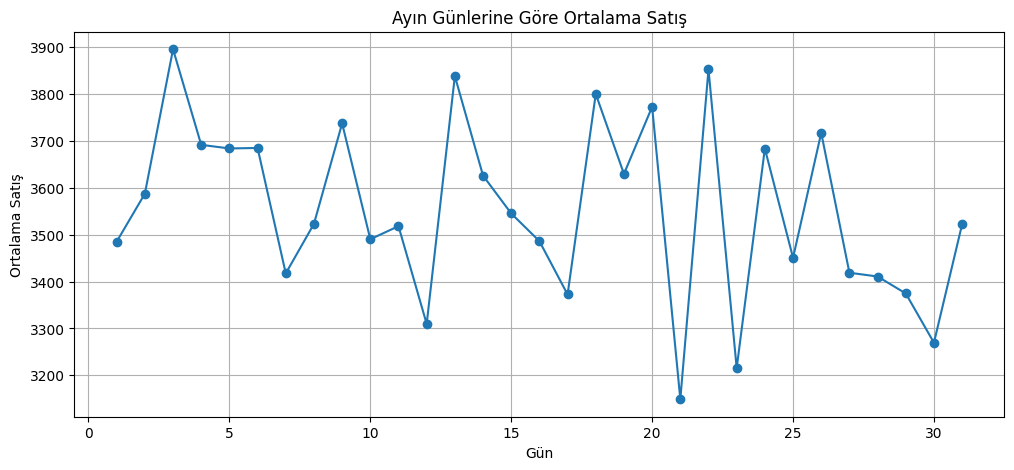

In [35]:
data_time['DAY_OF_MONTH'] = data_time['ORDERDATE'].dt.day

day_avg = data_time.groupby('DAY_OF_MONTH')['SALES'].mean()

day_avg.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Ayın Günlerine Göre Ortalama Satış")
plt.xlabel("Gün")
plt.ylabel("Ortalama Satış")
plt.grid(True)
plt.show()

In [36]:
combo_df = pd.concat([data['SALES'], data_obj['PRODUCT_DEAL_COMBO']], axis=1)

combo_summary = combo_df.groupby('PRODUCT_DEAL_COMBO')['SALES'].agg(['mean', 'sum', 'count']).sort_values('sum', ascending=False)
combo_summary.rename(columns={'mean': 'AVG_SALES', 'sum': 'TOTAL_SALES', 'count': 'ORDER_COUNT'}, inplace=True)

display(combo_summary)

,AVG_SALES,TOTAL_SALES,ORDER_COUNT
PRODUCT_DEAL_COMBO,,,
Medium_Classic Cars,4586.324646,2329852.92,508
Medium_Vintage Cars,4164.413859,1003623.74,241
Medium_Trucks and Buses,4676.588150,809049.75,173
Large_Classic Cars,8196.497500,754077.77,92
Small_Classic Cars,2041.461121,673682.17,330
Medium_Motorcycles,4345.717517,630129.04,145
Small_Vintage Cars,1883.727475,567001.97,301
Medium_Planes,4161.832419,516067.22,124
Medium_Ships,3946.901895,374955.68,95


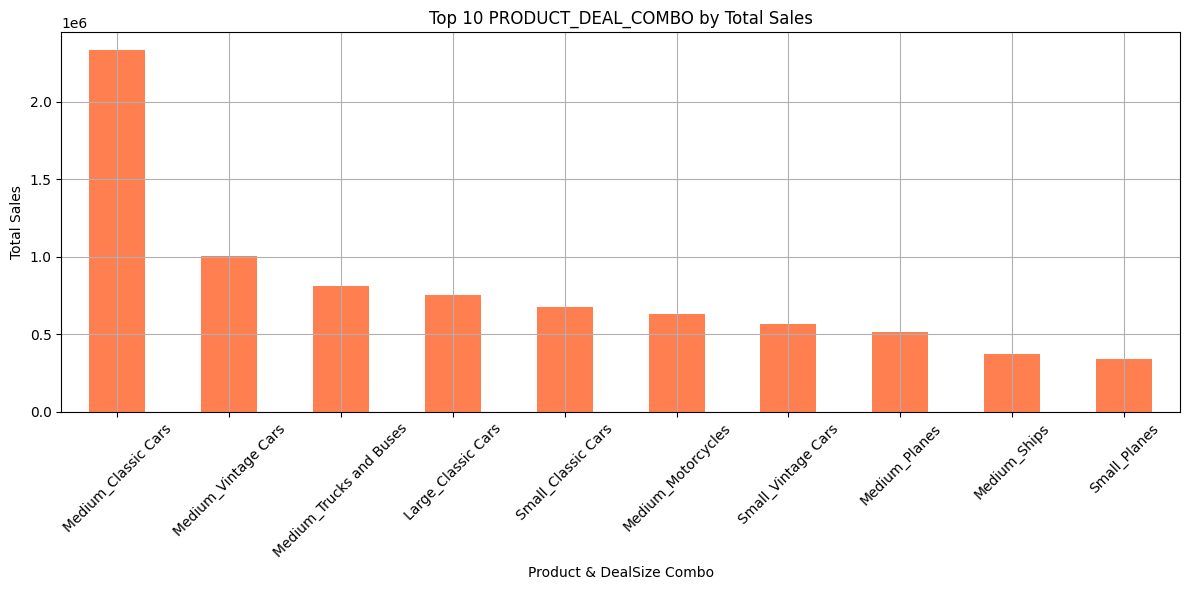

In [37]:
import matplotlib.pyplot as plt

# En yüksek toplam satış getiren ilk 10 kombinasyon
top_combos = combo_summary.head(10)

plt.figure(figsize=(12,6))
top_combos['TOTAL_SALES'].plot(kind='bar', color='coral')
plt.title('Top 10 PRODUCT_DEAL_COMBO by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product & DealSize Combo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
features_behavior = pd.DataFrame(index=data.index)

In [39]:
#Most bought product.
features_behavior['IS_CLASSIC_OR_VINTAGE'] = data['PRODUCTLINE'].apply(
    lambda x: 1 if x in ['Classic Cars', 'Vintage Cars'] else 0
)

In [40]:
#If it's a luxury spending, least common but same avg. spending.

premium_combos = ['Large_Classic Cars', 'Large_Motorcycles']

features_behavior['IS_LUXURY'] = data_obj['PRODUCT_DEAL_COMBO'].apply(
    lambda x: 1 if x in premium_combos else 0
)

In [41]:
features_behavior

,IS_CLASSIC_OR_VINTAGE,IS_LUXURY
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
2742,0,0.0
2743,0,0.0
2744,0,0.0
2745,0,0.0


In [42]:
features_behavior['IS_LUXURY'].value_counts()


IS_LUXURY
0.0    2565
1.0     108
Name: count, dtype: int64

In [43]:
# 1. En çok kazandıran 3 combo'yu bul
top_combos = combo_df.groupby('PRODUCT_DEAL_COMBO')['SALES'].sum().sort_values(ascending=False).head(3).index.tolist()

# 2. Feature olarak ata
features_behavior['IS_TOP_COMBO'] = combo_df['PRODUCT_DEAL_COMBO'].apply(lambda x: 1 if x in top_combos else 0)

In [44]:
features_behavior['IS_TOP_COMBO'].value_counts()

IS_TOP_COMBO
0    1825
1     922
Name: count, dtype: int64

In [45]:
#Noticed first column and last column has similiar values.
#So testing corr. between them.
features_behavior.corr()['IS_CLASSIC_OR_VINTAGE']['IS_TOP_COMBO']

np.float64(0.3664162871028176)

In [46]:
# Önce gerekli sütunları oluştur
data_time['WEEKDAY_NAME'] = data_time['ORDERDATE'].dt.day_name()

# Müşteri + Gün bazında sipariş sayısını al
customer_day_counts = data_time.groupby(['CUSTOMERNAME', 'WEEKDAY_NAME']).size().reset_index(name='ORDER_COUNT')

# Her müşteri için en çok sipariş verdiği günü bul
top_day_per_customer = customer_day_counts.sort_values('ORDER_COUNT', ascending=False).drop_duplicates('CUSTOMERNAME')

print(top_day_per_customer.head())


                     CUSTOMERNAME WEEKDAY_NAME  ORDER_COUNT
137  Mini Gifts Distributors Ltd.       Monday           90
80          Euro Shopping Channel       Sunday           77
146            Muscle Machine Inc       Sunday           48
1                  AV Stores, Co.       Sunday           34
155       Oulu Toy Supplies, Inc.       Friday           32


In [47]:
# Ülke ve şehir bazında sipariş sayısı
country_city_orders = data_time.groupby(['COUNTRY', 'CITY']).size().reset_index(name='ORDER_COUNT')

# Çok sipariş alan ülke-şehirleri görmek istersen:
country_city_orders_sorted = country_city_orders.sort_values('ORDER_COUNT', ascending=False)

print(country_city_orders_sorted.head())


      COUNTRY        CITY  ORDER_COUNT
41      Spain      Madrid          304
69        USA  San Rafael          180
60        USA         NYC          152
39  Singapore   Singapore           79
21     France       Paris           70


C:\Users\Serhat Turan\AppData\Local\Temp\ipykernel_10772\3880742489.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=favorite_day_distribution.index, y=favorite_day_distribution.values, palette='viridis')


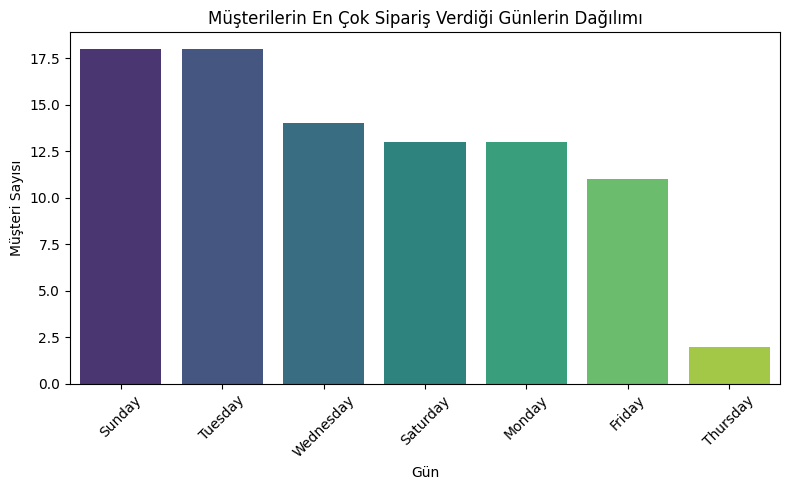

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerekli sütunlar
data_time['WEEKDAY_NAME'] = data_time['ORDERDATE'].dt.day_name()

# Müşteri + Gün bazlı sipariş sayısı
customer_day_counts = data_time.groupby(['CUSTOMERNAME', 'WEEKDAY_NAME']).size().reset_index(name='ORDER_COUNT')

# En çok sipariş verilen gün (her müşteri için)
top_day_per_customer = customer_day_counts.sort_values('ORDER_COUNT', ascending=False).drop_duplicates('CUSTOMERNAME')

# Toplamda hangi gün daha fazla müşteri tarafından "en çok sipariş verilen gün" seçilmiş?
favorite_day_distribution = top_day_per_customer['WEEKDAY_NAME'].value_counts()

# Görselleştir
plt.figure(figsize=(8,5))
sns.barplot(x=favorite_day_distribution.index, y=favorite_day_distribution.values, palette='viridis')
plt.title("Müşterilerin En Çok Sipariş Verdiği Günlerin Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Ürün segmenti: örnek -> "LARGE_CLASSIC CARS"
data_time['PRODUCT_SEGMENT'] = data_time['DEALSIZE'].str.upper() + "_" + data_time['PRODUCTLINE'].str.upper()


In [50]:
# Müşteri - ürün segmenti matrisi (adet bazlı)
product_segment_matrix = data_time.groupby(['CUSTOMERNAME', 'PRODUCT_SEGMENT']).size().unstack(fill_value=0)


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Müşteri benzerlik matrisi
similarities = pd.DataFrame(
    cosine_similarity(product_segment_matrix),
    index=product_segment_matrix.index,
    columns=product_segment_matrix.index
)

# Örnek: Bir müşteri seç ve ona benzeyen 5 kişiyi bul
example_customer = product_segment_matrix.index[0]  # örnek ilk müşteri
top_similars = similarities[example_customer].sort_values(ascending=False).head(6)[1:]  # kendisi hariç
print("En benzer 5 müşteri:", top_similars)


En benzer 5 müşteri: CUSTOMERNAME
Online Diecast Creations Co.    0.904120
Collectables For Less Inc.      0.879164
Saveley & Henriot, Co.          0.873775
Mini Gifts Distributors Ltd.    0.862167
Signal Gift Stores              0.861804
Name: AV Stores, Co., dtype: float64


In [52]:
# Benzer müşterilerin şehir bilgisi
similar_customers = top_similars.index.tolist()

# Benzeyen müşterilerin şehir bilgilerini al
similar_customer_cities = data_time[data_time['CUSTOMERNAME'].isin(similar_customers)][['CUSTOMERNAME', 'CITY']].drop_duplicates()
print(similar_customer_cities)


                     CUSTOMERNAME        CITY
32         Saveley & Henriot, Co.        Lyon
42   Mini Gifts Distributors Ltd.  San Rafael
43   Online Diecast Creations Co.      Nashua
46     Collectables For Less Inc.  Brickhaven
441            Signal Gift Stores   Las Vegas


In [53]:
# Şehir - Ürün segmenti çapraz tablo
city_product_matrix = data_time.groupby(['CITY', 'PRODUCT_SEGMENT']).size().unstack(fill_value=0)

# En çok hangi şehir hangi segmenti alıyor?
top_segments_by_city = city_product_matrix.apply(lambda x: x.idxmax(), axis=1)
print(top_segments_by_city.head())


CITY
Aaarhus         MEDIUM_CLASSIC CARS
Allentown    SMALL_TRUCKS AND BUSES
Barcelona              MEDIUM_SHIPS
Bergamo          SMALL_VINTAGE CARS
Bergen          MEDIUM_CLASSIC CARS
dtype: object


In [54]:
# Gerekli sütunları seç
data_model = data[['CUSTOMERNAME', 'SALES', 'ORDERNUMBER', 'DEALSIZE', 'CITY', 'COUNTRY', 'DAYS_SINCE_LASTORDER']]

# RFM ve demografik gruplama
rfm = data_model.groupby('CUSTOMERNAME').agg({
    'ORDERNUMBER': 'nunique',         # Frequency
    'SALES': 'sum',                   # Monetary
    'DAYS_SINCE_LASTORDER': 'min',    # Recency
    'DEALSIZE': 'first',              # DealSize
    'CITY': 'first',                  # City
    'COUNTRY': 'first'                # Country
}).reset_index()

# Kolon adlarını değiştir
rfm.columns = ['CustomerName', 'Frequency', 'Monetary', 'Recency', 'DealSize', 'City', 'Country']


In [55]:
# Ordinal encode - DealSize
rfm['DealSize'] = rfm['DealSize'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# One-hot encode - City ve Country
data_encoded = pd.get_dummies(rfm, columns=['City', 'Country'], drop_first=True)


In [56]:
# RFM tablosunu oluştur
rfm = data.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (datetime(2020,6,1)- x.max()).days,   # Recency
    'ORDERNUMBER': 'nunique',                              # Frequency
    'SALES': 'sum'                                     # Monetary
}).reset_index()

# Kolonları yeniden adlandır
rfm.columns = ['CUSTOMERNAME', 'Recency', 'Frequency', 'Monetary']

In [57]:
rfm['Recency']

0     197
1      65
2     266
3      84
4     189
     ... 
84    276
85    209
86    195
87    489
88    213
Name: Recency, Length: 89, dtype: int64

In [58]:
data.groupby('CUSTOMERNAME')['DAYS_SINCE_LASTORDER'].describe()

,count,mean,std,min,25%,50%,75%,max
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",51.0,1803.803922,699.140673,421.0,1333.00,1783.0,2397.00,2969.0
Alpha Cognac,20.0,2236.200000,779.633693,675.0,1624.75,2483.5,2750.75,3272.0
Amica Models & Co.,26.0,1318.615385,691.379842,328.0,797.25,1200.0,1720.00,3003.0
"Anna's Decorations, Ltd",46.0,1463.586957,785.858330,131.0,828.75,1522.5,2052.00,2939.0
Atelier graphique,7.0,1424.428571,622.698391,312.0,1140.00,1566.0,1815.00,2183.0
...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",31.0,1362.935484,637.914359,440.0,824.50,1338.0,1907.50,2527.0
Vitachrome Inc.,25.0,1591.880000,763.502582,432.0,900.00,1576.0,2233.00,2792.0
"Volvo Model Replicas, Co",19.0,1319.789474,645.662586,338.0,856.00,1323.0,1779.00,2608.0


In [59]:
# Recency skoru (bunu genelde sorunsuz böler)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency skorunu dinamik bins ile bölelim
freq_bins = pd.qcut(rfm['Frequency'], q=4, duplicates='drop')
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=freq_bins.unique().categories, labels=range(1, len(freq_bins.unique().categories)))

# Monetary skorunu da aynı şekilde
monetary_bins = pd.qcut(rfm['Monetary'], q=4, duplicates='drop')
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins.unique().categories, labels=range(1, len(monetary_bins.unique().categories)))

# Skorları string birleştir (segment)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print(rfm.head())


              CUSTOMERNAME  Recency  Frequency   Monetary R_Score  \
0           AV Stores, Co.      197          3  157807.81       2   
1             Alpha Cognac       65          3   70488.44       4   
2       Amica Models & Co.      266          2   94117.26       1   
3  Anna's Decorations, Ltd       84          4  153996.13       3   
4        Atelier graphique      189          3   24179.96       2   

        F_Score                 M_Score                         RFM_Segment  
0    (2.0, 3.0]  (120562.74, 912294.11]   2(2.0, 3.0](120562.74, 912294.11]  
1    (2.0, 3.0]    (9129.349, 70488.44]     4(2.0, 3.0](9129.349, 70488.44]  
2  (0.999, 2.0]   (87489.23, 120562.74]  1(0.999, 2.0](87489.23, 120562.74]  
3   (3.0, 26.0]  (120562.74, 912294.11]  3(3.0, 26.0](120562.74, 912294.11]  
4    (2.0, 3.0]    (9129.349, 70488.44]     2(2.0, 3.0](9129.349, 70488.44]  


In [60]:
import pandas as pd

# Recency skoru (4 parçaya böleriz)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)

# Frequency skoru
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)

# Monetary skoru
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)

# Segment fonksiyonu
def segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'VIP Müşteri'
    elif row['R_Score'] >= 3 and row['F_Score'] < 3:
        return 'Potansiyel Sadık'
    elif row['R_Score'] < 3 and row['F_Score'] >= 3:
        return 'Terk Riski'
    else:
        return 'Kaybedilmiş'

# Uygula
rfm['Segment'] = rfm.apply(segment, axis=1)

# Sonuç
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'Segment']].head())


   Recency  Frequency   Monetary  R_Score  F_Score  M_Score           Segment
0      197          3  157807.81        2        2        4       Kaybedilmiş
1       65          3   70488.44        4        2        1  Potansiyel Sadık
2      266          2   94117.26        1        1        3       Kaybedilmiş
3       84          4  153996.13        3        4        4       VIP Müşteri
4      189          3   24179.96        2        2        1       Kaybedilmiş


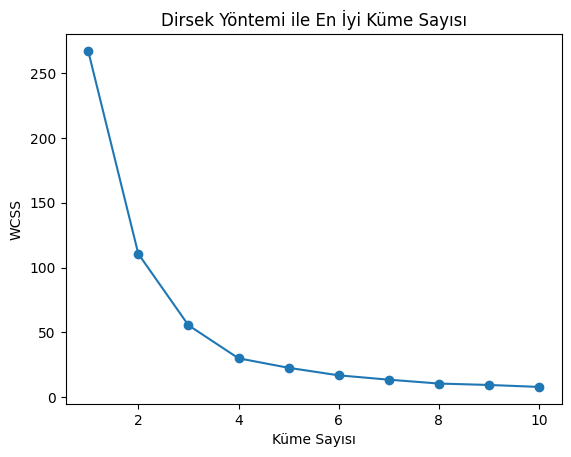

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Kullandığımız skor sütunları
rfm_for_cluster = rfm[['Recency', 'Frequency', 'Monetary']]

# 2) Standartlaştırma (ölçekleme)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_cluster)

# 3) En iyi küme sayısını bulalım (Dirsek Yöntemi)
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# 4) Dirsek Grafiği
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Dirsek Yöntemi ile En İyi Küme Sayısı')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()


In [62]:
# 5) KMeans uygulayalım (4 küme örneği)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(rfm_scaled)

# 6) Sonuçları RFM tablosuna ekleyelim
rfm['KMeans_Cluster'] = clusters

# 7) Küme sonuçlarına bakalım
print(rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


                   Recency  Frequency       Monetary
KMeans_Cluster                                      
0                50.392857   3.500000  113329.343214
1               203.583333   2.791667   89257.651250
2                 2.000000  21.500000  783576.085000
3               444.272727   2.090909   66861.879091


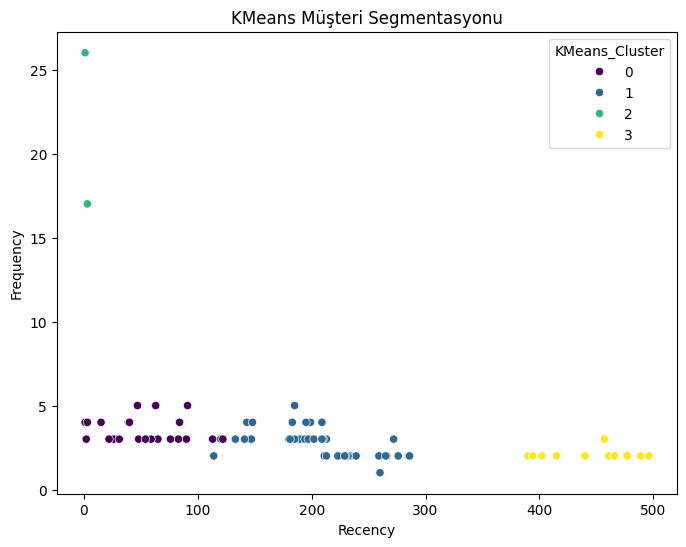

In [63]:
# 8) 2D görsel: Recency vs Frequency
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='KMeans_Cluster', palette='viridis')
plt.title('KMeans Müşteri Segmentasyonu')
plt.show()


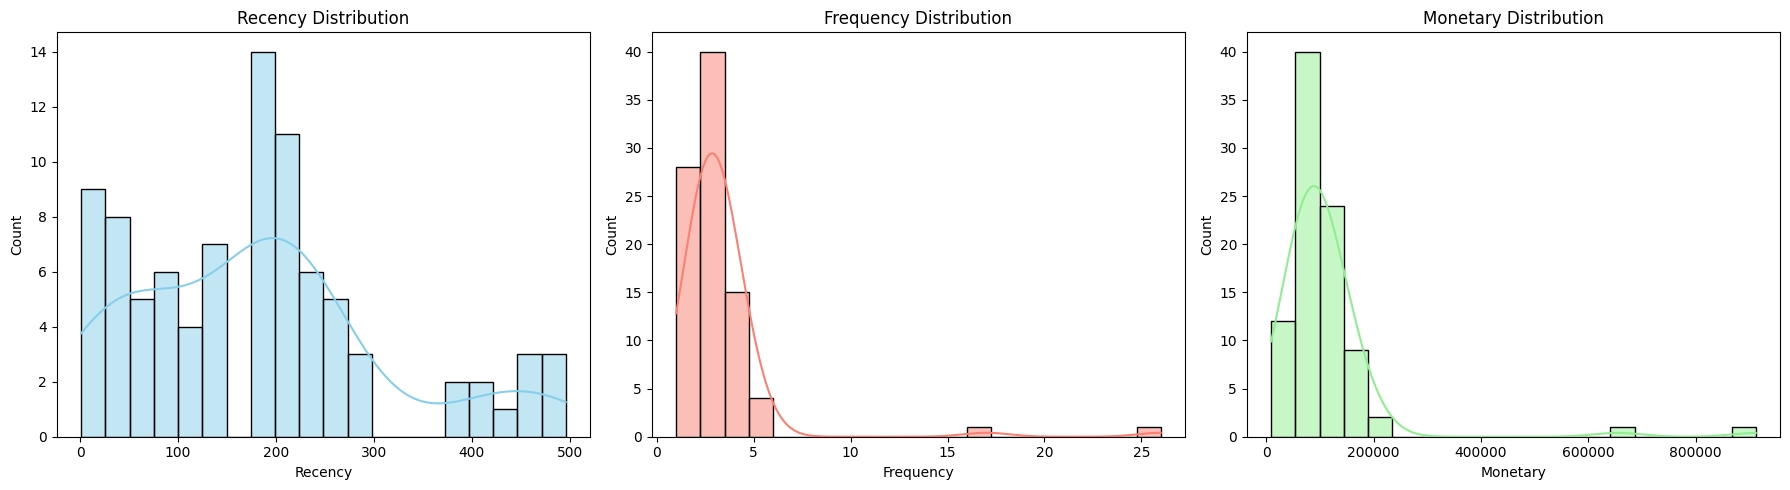

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

C:\Users\Serhat Turan\AppData\Local\Temp\ipykernel_10772\1381299634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


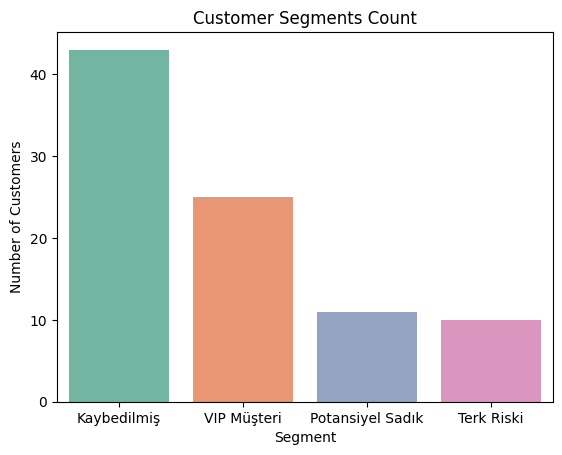

In [65]:
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title("Customer Segments Count")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.show()

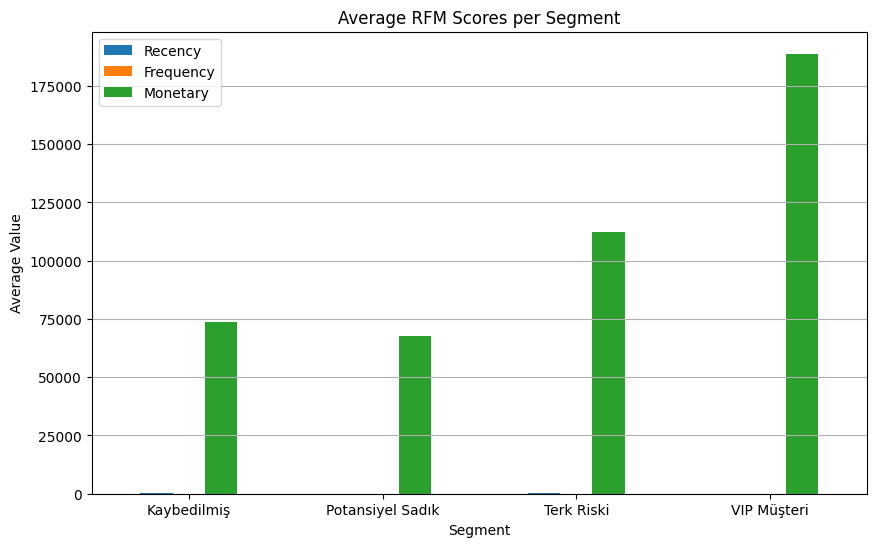

In [66]:
rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average RFM Scores per Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [67]:
rfm = rfm.reset_index(drop=True).merge(, on='CUSTOMERNAME', how='left')


SyntaxError: invalid syntax (3738685686.py, line 1)

In [ ]:
# Şehir bilgisi: one-hot encoding (sayısal hale getirme)
city_dummies = pd.get_dummies(data['CITY'], prefix='CITY')

# Sipariş gün farkı: müşteri bazında ortalama gün farkı
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
siparis_gun_farki = data.sort_values(['CUSTOMERNAME', 'ORDERDATE']).groupby('CUSTOMERNAME')['ORDERDATE'].diff().dt.days
data['Gun_Farki'] = siparis_gun_farki

# Müşteri bazında ortalama gün farkı
gun_farki_avg = data.groupby('CUSTOMERNAME')['Gun_Farki'].mean().reset_index()
gun_farki_avg.rename(columns={'Gun_Farki': 'Ortalama_Gun_Farki'}, inplace=True)

# RFM tablosuna bu bilgileri merge edelim
rfm = rfm.reset_index().merge(gun_farki_avg, on='CUSTOMERNAME', how='left')

# Şehir bilgilerini de ekleyelim (müşteri bazında 1 şehir olduğu varsayımıyla)
musteri_sehir = data[['CUSTOMERNAME', 'CITY']].drop_duplicates()
rfm = rfm.merge(musteri_sehir, on='CUSTOMERNAME', how='left')

# Şehir one-hot encoding (müşteri tablosuna ekle)
city_dummies = pd.get_dummies(rfm['CITY'], prefix='CITY')
rfm_extended = pd.concat([rfm, city_dummies], axis=1)


In [ ]:
print(data.columns)


In [ ]:
# Kümelere göre öneri metinleri
oneriler = {
    0: "Sana özel indirim! Sık alışveriş yapan müşterilerimize %20 indirim!",
    1: "Tekrar hoş geldin! Şimdi sipariş verirsen ücretsiz kargo seni bekliyor.",
    2: "Popüler ürünler: En çok satanları denemek ister misin? Sepetinde %15 indirim!",
    3: "Özel VIP kampanya: Sadık müşterilerimize özel yeni ürün denemeleri!"
}


In [ ]:
def musteriye_oneri(musteri_id):
    # Müşteri kümesini bul
    cluster = rfm_extended.loc[rfm_extended['CUSTOMERNAME'] == musteri_id, 'KMeans_Cluster_Enhanced'].values
    if len(cluster) == 0:
        return "Müşteri bulunamadı!"
    cluster_no = cluster[0]
    
    # Kümesine göre öneri döndür
    return oneriler.get(cluster_no, "Genel kampanya: Tüm ürünlerde %10 indirim!")


In [ ]:
# Örnek: MusteriID = 12345 için öneri al
CUSTOMERNAME = 12345  # Buraya gerçek MusteriID yaz
print(musteriye_oneri(CUSTOMERNAME))
